In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import cmocean as cmo
from sklearn.linear_model import LinearRegression
import cartopy.crs as ccrs
import pandas as pd 
import numpy as np
import netCDF4
import glob
from dateutil.parser import parse


c:\Users\byrub\anaconda3\lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
from dateutil.parser import parse
# take 1...let's try to find some riverine discharge data (if we're lucky)
filepath = "../Data/NASA MUREP/Plots for Hanna (GOM)/gcoos_2020_01_air_temperature.csv"
df = pd.read_csv(filepath, sep = ",")
#rawdata = df[["date","air_temperature"]]
data = df.copy()
cleandata = data['air_temperature '] = data['air_temperature '].replace(r'^[A-Za-z].*', np.NaN, regex=True)
data.dropna(inplace=True)
#data=data.astype({'date':'DATETIME'})
#data=data.astype({'ait_temperature ':'float'})
#data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%dT%H:%M:%S")
data['date'] = data['date'].apply(lambda x: parse(x))
data['air_temperature '] = data['air_temperature '].astype(float)
print(data)


#num_ticks = 10
#x_ticks_positions = np.linspace(xmin, xmax, num_ticks)

#print(xmin,xmax,ymin,ymax)
#ax.set_ylim(ymin, ymax)
#ax.set_xlim(xmin, xmax)

#x = data['date']
#y = data['air_temperature ']
#print(x,y)
#plt.plot(x, y,'m-')
#df
#nc = netCDF4.df(filepath)
#curr = df.variables['current']

KeyboardInterrupt: 

Text(0.5, 1.0, 'January 2020 Sky Temperature (C)')

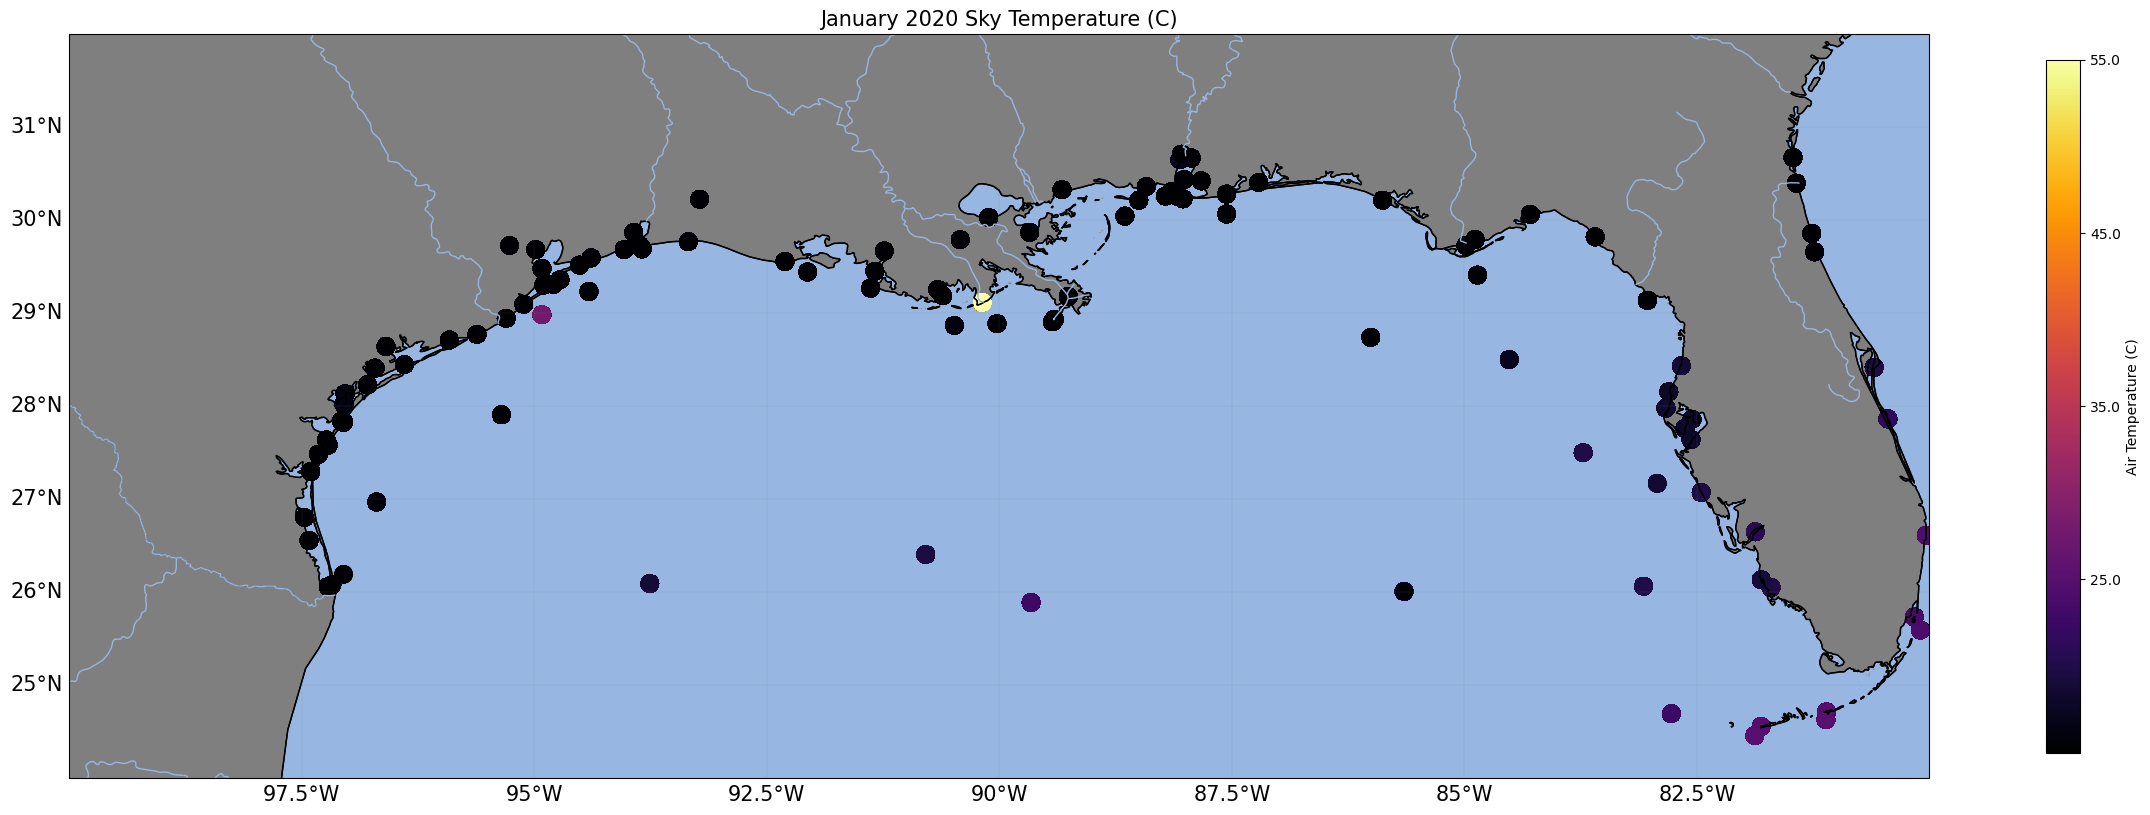

In [14]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from dateutil.parser import parse
import cmocean.cm as cmo
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# take 1...let's try to find some riverine discharge data (if we're lucky)
filepath1 = "../Data/NASA MUREP/Plots for Hanna (GOM)/gcoos_2020_01_air_temperature.csv"
df1 = pd.read_csv(filepath1, sep=',')
data = df1.copy()
cleandata = data['air_temperature '] = data['air_temperature '].replace(r'^[A-Za-z].*', np.NaN, regex=True)
data.dropna(inplace=True)
# TODO - make colorbar
projection = ccrs.PlateCarree(central_longitude=0)
cmap = plt.get_cmap('inferno')
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(1, 1, 1, projection=projection)
sc = ax.scatter(df['longitude'], df['latitude'], c = df["air_temperature "], cmap=cmap, marker='o', label='Scatter Points', vmin=15, vmax=55, s=150)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylocator = mticker.FixedLocator([-100, -80, 24, 32])
#gl.xlocator = mticker.FixedLocator([-100, -80, 24, 32])
gl.xlabel_style = {'size': 15, 'color': 'black'}  
gl.ylabel_style = {'size': 15, 'color': 'black'}
#gl.xlabels_top = False 
#gl.ylabels_right = True
gl.left_labels=True
gl.right_labels = False
gl.top_labels=False

cbar = plt.colorbar(sc, ax=ax, orientation='vertical', label='Air Temperature (C)', shrink = 0.3)
#cbar.ax.set_yticklabels(['25', '35', '45', '55'])
cbar.ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
#ticks = [25, 35, 45, 55]  # Specify the desired tick values
#tick_labels = [f"{val:.1f}" for val in ticks]  # Format the tick labels as desired
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)
#plt.colorbar(shrink=0.5)

#matplotlib.pyplot.colorbar(mappable=None, shrink=scale)
#mappable = ax.scatter(df1['longitude'], df1['latitude'], c=df1['air_temperature'], cmap=cmo.balance, vmin=-0.4, vmax=0.4)
#cb = fig.colorbar(mappable, extend='min')
#cb.set_label('Air Temperature (C)')
ax.coastlines(resolution='10m')
ax.set_extent([-100, -80, 24, 32], ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, color='tab:gray')
ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines(resolution='10m')  # looks better with resolution='10m'
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', lw=.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.set_title('January 2020 Sky Temperature (C)', fontsize='15')

In [ ]:
import xarray as xr
# take 2
filepath2 = "../Data/NASA MUREP/Plots for Hanna (GOM)/gcoos_2020_01_wind.csv"
df2 = pd.read_csv(filepath2)
df2

,network,platform,latitude,longitude,date,vertical_datum,wind_speed,wind_to_direction,wind_speed_of_gust
0,ADCP,ioos:station:wmo:42395,26.4040,-90.7920,2020-01-01T00:00:00Z,3.0,7.00,60.00,9.00
1,CenGOOS,ioos:station:wmo:42067,30.0430,-88.6490,2020-01-01T00:00:00Z,5.0,5.00,250.00,6.00
2,ENP,ioos.station.NOAA.NDBC:WRBF1,25.0720,-80.7350,2020-01-01T00:00:00Z,1.0,2.10,210.00,-9999.00
3,LUMCON,ioos:station:LUMCON:102,29.1870,-90.6093,2020-01-01T00:00:00Z,0.0,3.80,267.00,3.90
4,LUMCON,ioos:station:LUMCON:wisl1,29.1144,-90.1840,2020-01-01T00:00:00Z,1.0,1.00,191.00,13.30
...,...,...,...,...,...,...,...,...,...
124452,NDBC,ioos:station:wmo:42057,17.0020,-81.5010,2020-01-31T23:50:00Z,5.0,7.00,110.00,9.00
124453,COMPS,ioos:station:USF.COMPS:FHP,28.1530,-82.8010,2020-01-31T23:54:00,10.0,3.08,159.57,3.91
124454,COMPS,ioos:station:USF.COMPS:SHP,30.0600,-84.2910,2020-01-31T23:54:00,10.0,0.79,50.83,1.66
124455,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
